<a href="https://colab.research.google.com/github/JakeOh/202205_itw_bd34/blob/main/ml14_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans  # 비지도 학습 clustering 알고리즘
from sklearn.decomposition import PCA  # 주성분 분석, 비지도 학습

# Fruit datasets

In [2]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy
# !linux명령어
# wget 파일저장위치(URL) -O 파일이름: URL에서 데이터를 다운로드해서 파일에 저장.

--2022-06-28 01:08:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-06-28 01:08:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-06-28 01:08:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

npy 파일: numpy의 배열을 저장한 파일 타입
*   `np.save(file, arr)`: 배열 arr을 파일 file에 npy 포맷으로 저장.
*   `np.load(file)`: npy 포맷으로 저장된 파일을 읽어서 배열을 복원.

In [3]:
fruits = np.load('fruits_300.npy')

In [4]:
fruits.shape  # (n_samples, height, width)

(300, 100, 100)

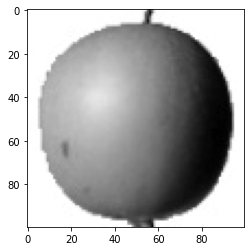

In [10]:
# 첫번째 이미지 시각화
img = fruits[0]
plt.imshow(img, cmap=plt.cm.binary)
plt.show()

10x10 subplot을 생성해서 이미지 100개 씩 시각화

In [11]:
def plot_fruits(arr, n_rows=10, n_cols=10, start=0):
    # n_rows x n_cols 개수의 subplot들을 생성
    fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    for i in range(n_rows):
        for j in range(n_cols):
            img = arr[start + i * n_cols + j]  # subplot에 그릴 이미지
            ax[i, j].imshow(img, cmap=plt.cm.binary)
            ax[i, j].axis('off')
    plt.show()

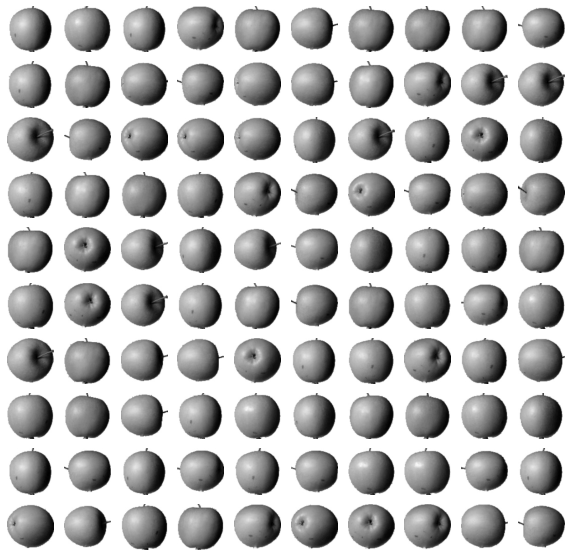

In [12]:
plot_fruits(fruits)

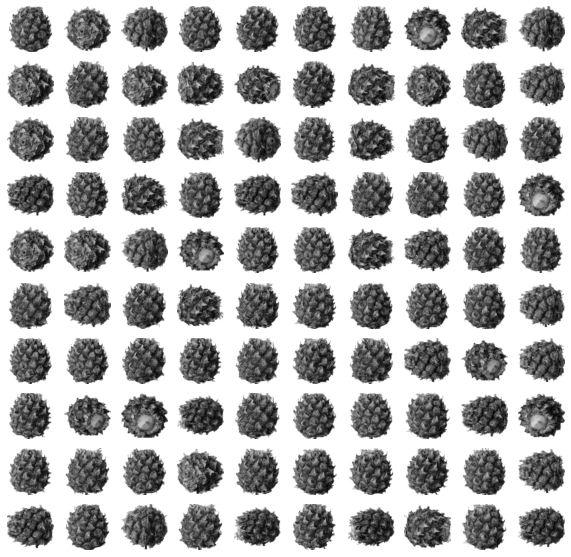

In [13]:
plot_fruits(fruits, start=100)

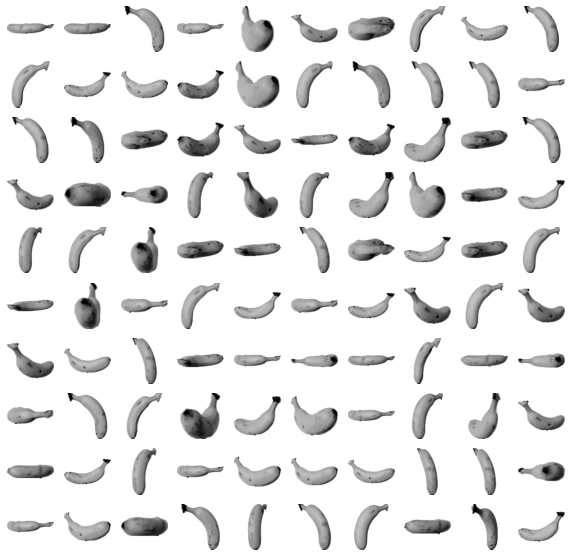

In [14]:
plot_fruits(fruits, start=200)

# Pixel 분석

In [18]:
# (300, 100, 100) shape의 3차원 배열을 (300, 100*100) shape의 2차원 배열로 변환
apple = fruits[:100, :, :].reshape((100, -1))  # (100, 100*100)
pineapple = fruits[100:200, :, :].reshape((100, -1))
banana = fruits[200:, :, :].reshape((100, -1))

In [19]:
apple.shape, pineapple.shape, banana.shape
# shape: (n_samples, n_pixels)

((100, 10000), (100, 10000), (100, 10000))

## 각 샘플(각각의 과일)에서 픽셀들의 평균값

In [20]:
apple_mean = np.mean(apple, axis=1)
apple_mean

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [21]:
pineapple_mean = np.mean(pineapple, axis=1)
banana_mean = np.mean(banana, axis=1)

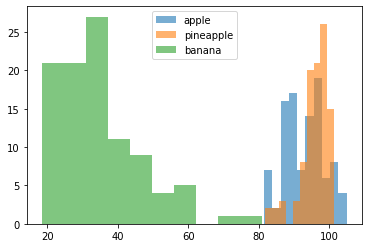

In [22]:
# 과일의 픽셀 평균값의 분포 - 히스토그램
plt.hist(apple_mean, alpha=0.6, label='apple')
plt.hist(pineapple_mean, alpha=0.6, label='pineapple')
plt.hist(banana_mean, alpha=0.6, label='banana')
plt.legend()
plt.show()

## 각 픽셀 별로 평균 분석

In [23]:
apple_px_mean = np.mean(apple, axis=0)
pineapple_px_mean = np.mean(pineapple, axis=0)
banana_px_mean = np.mean(banana, axis=0)

In [24]:
apple_px_mean.shape, pineapple_px_mean.shape, banana_px_mean.shape

((10000,), (10000,), (10000,))

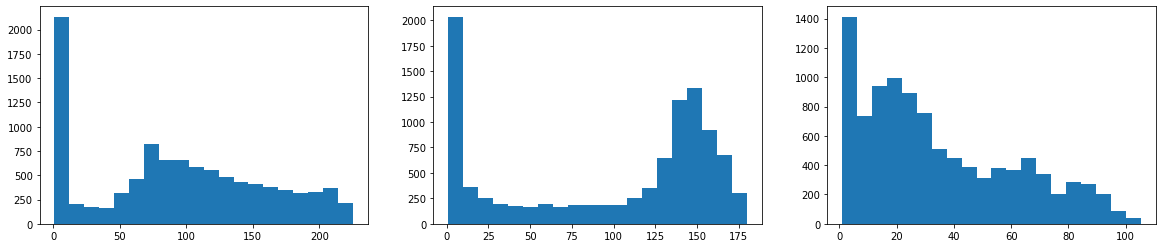

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
ax[0].hist(apple_px_mean, bins=20)
ax[1].hist(pineapple_px_mean, bins=20)
ax[2].hist(banana_px_mean, bins=20)

plt.show()

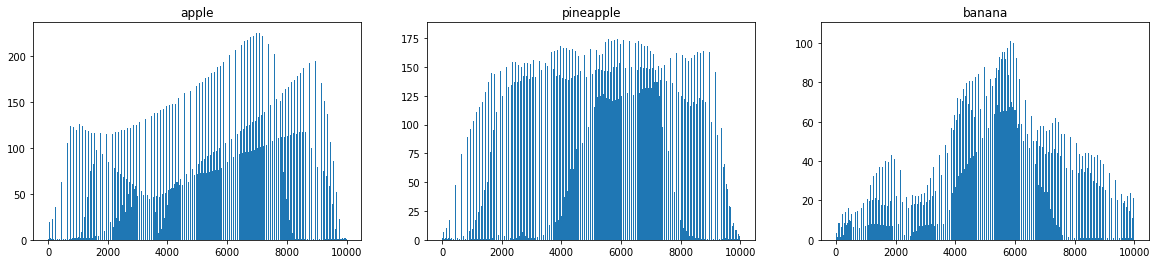

In [29]:
# 각 픽셀 평균값의 크기를 막대 그래프로 표현
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
x_values = np.arange(100 * 100)  # 이미지 한 개에서 pixel의 개수
ax[0].bar(x_values, apple_px_mean)  # y축: 각 픽셀 별 평균값 10,000개
ax[0].set_title('apple')
ax[1].bar(x_values, pineapple_px_mean)
ax[1].set_title('pineapple')
ax[2].bar(x_values, banana_px_mean)
ax[2].set_title('banana')

plt.show()

각 픽셀들의 평균값 배열(shape: (10000,))을 (100, 100) shape의 2차원 배열로 변환해서 이미지로 그림.

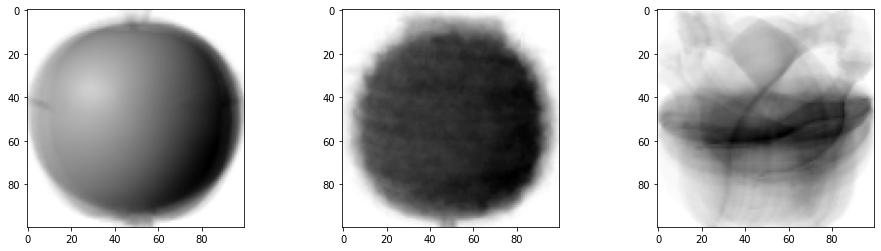

In [30]:
fig, ax = plt.subplots(ncols=3, figsize=(16, 4))
ax[0].imshow(apple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[1].imshow(pineapple_px_mean.reshape((100, 100)), cmap=plt.cm.binary)
ax[2].imshow(banana_px_mean.reshape((100, 100)), cmap=plt.cm.binary)

plt.show()

## 픽셀들의 평균값과 가까운 이미지 찾기

*   diff = 실제 픽셀값 - 픽셀 평균값
*   diff의 절대값
*   diff 절대값들의 평균
*   diff 절대값 평균이 작은 순서로 선택

In [32]:
fruits_2d = fruits.reshape((300, -1))
fruits_2d.shape  # (n_samples, n_pixels)

(300, 10000)

In [33]:
diff = fruits_2d - apple_px_mean  # 실젯값과 평균값의 차이
diff_abs = np.abs(diff)  # 차이들의 절대값
diff_abs_mean = np.mean(diff_abs, axis=1)  # 차이의 절대값들의 평균
diff_abs_mean  #> shape: (300,)

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [34]:
# np.argsort(arr): 배열 arr을 (오름차순) 정렬한 인덱스를 리턴.
apple_like_idx = np.argsort(diff_abs_mean)
apple_like_idx[:100]

array([33, 48, 70, 57, 87, 12, 78, 59,  1, 74, 86, 38, 50, 92, 69, 27, 68,
       30, 66, 24, 76, 98, 15, 84, 47, 90,  3, 94, 53, 23, 14, 71, 32,  7,
       73, 36, 55, 77, 21, 10, 17, 39, 99, 95, 11, 35, 65,  6, 61, 22, 56,
       89,  2, 13, 80,  0, 97,  4, 58, 34, 40, 43, 75, 82, 54, 16, 31, 49,
       93, 37, 63, 64, 41, 28, 67, 25, 96,  8, 83, 46, 19, 79, 72,  5, 85,
       29, 20, 60, 81,  9, 45, 51, 88, 62, 91, 26, 52, 18, 44, 42])

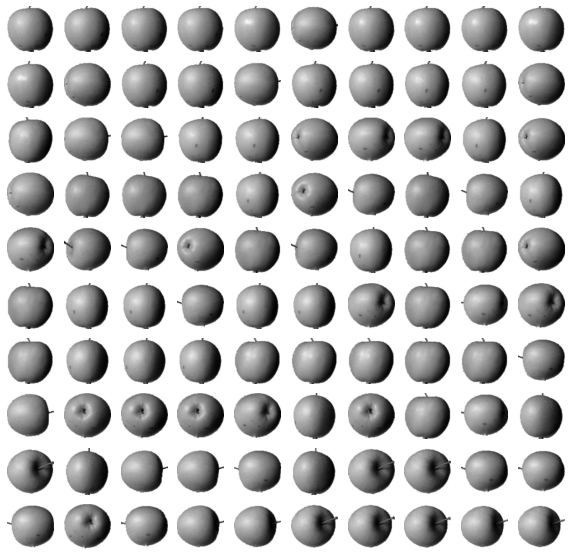

In [35]:
apple_like = fruits[apple_like_idx]
plot_fruits(apple_like)